<a href="https://colab.research.google.com/github/tsunamifi/Tsunamifi-s-Tweet-Emotion-Analyzer/blob/main/tsunamifis_twittr_sentiment_analysis_botv1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tsunamifi's Twitter Sentiment Analysis Bot
This notebook will allow you to plug in a user OR topic from twitter and determine if their tweets are Positive, Negative or Neutral.

Why? for fun, probably.

# Setup

In [6]:
#core setup.
##importing things here!
### pandas helps us sort data, we'll need it if you want to see results.
import pandas as pd

### matplot helps us visualize data too.
import matplotlib.pyplot as plt

### ntlk is a word processing library, we can use it to parse our tweets for our goal.
import nltk
from wordcloud import WordCloud,STOPWORDS
nltk.download('punkt')   
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

### tweepy is the official twitter python library/api; this is how we'll be able to source our tweets.
### textblob is a text processing library.
import tweepy
from tweepy import OAuthHandler
from textblob import TextBlob

### MISC
import re
import time

### display is so we can display a dataframe from pandas or something else.
from IPython.display import display

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
# defining twitter auth setup here!
def auth():

    ## keys and token from twitter'
    consumer_key = "KLhloeEIOr2de1Cnz7ddcxcmT"
    consumer_secret = "WPQeRE5skCsCfBK8inJSPFTOEFMCUrPGMUyKsi1kjo8xKDaoxQ"
    access_token = "1450493640132923397-NQ1fupgKuJZKZbPsi3gYw9EnngxapO"
    access_token_secret = "eH3IvjkUatJuU7EdYtoSMZckBbIWtPpvYNFUW078VvMK4"

    ## attempting auth...
    try:
      auth = OAuthHandler(consumer_key, consumer_secret)
      auth.set_access_token(access_token, access_token_secret)
      api = tweepy.API(auth)
      return api
    except:
      print("Error: Authentification Failed, try again?")
      exit(1)

In [8]:
## this will clean unnecessary and maybe complicated things out of a tweet
## like links or #'s 
def cleanup(text):

     ### replaces all letters and numbers associated with chars like "\/:"
     ### (which are chars used in links) with spaces which removes them.
     ### we're also tokenizing each word here
      
      text = re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)', ' ', text)
  
      text_tokens = word_tokenize(text)
      text = [word for word in text_tokens if not word in stopwords.words()]

      text = ' '.join(text)
      return text


## here we're getting rid of parts of words that dont mean anything
## in sentiment analysis so we'll end up with just scoring rootwords
def root(text):

  porter = PorterStemmer()
  token_words = word_tokenize(text)
  root_sentence = []
  for word in token_words:
    root_sentence.append(porter.stem(word))
  return " ".join(root_sentence)    
    
    
## lets find out the cleaned tweets' general emotion!
def get_tweet_score(analysis):

    ###"scoring" tweet
    if analysis.sentiment.polarity > 0:
      return 'positive'
    elif analysis.sentiment.polarity < 0:
      return 'negative'
    else:
      return 'neutral'

In [9]:
## we're gonna grab this x amount of tweets to parse
def fetch_tweets(query, count = 50):

    api = auth()
    ### empty list to hold tweets
    tweets = []  

    collected_tweets = api.search(q = query + ' -filter:retweets', count = count)
    
    ### this is a pipeline to do all our our tweet processing
    for Tweet in collected_tweets:
        parsed_tweet = Tweet.text
        clean_tweet = cleanup(parsed_tweet)
        stem_tweet = TextBlob(root(clean_tweet))
        scored_tweet = get_tweet_score(stem_tweet)
        tweets.append((parsed_tweet, clean_tweet, scored_tweet))
        
    return tweets

In [10]:
#@title #Choose Topic or User to analyze { display-mode: "form" }
#@markdown You're welcome to use both a user and topic but both at the same time are not required, you can use one or the other too if you'd like.


# Take off... 
Topic = "trump" #@param {type: "string"}
How_Many_Tweets =  200#@param {type:"number"}

def run():
  tweets = fetch_tweets(query = Topic, count = How_Many_Tweets)

  ## sort and grab percentages between each type
  ## of tweet with pandas..
  df = pd.DataFrame(tweets, columns= ['Tweets', 'Scrubbed Tweets', 'Result'])


  ### dropping duplicate tweets too..
  df = df.drop_duplicates(subset='Scrubbed Tweets')
  df.to_csv('tweetbank.csv', index= False)

  ptweets = df[df['Result'] == 'positive']
  print("Percentage of positive tweets from: " + Topic + " {} %".format(100*len(ptweets)/len(tweets)))
   
  ntweets = df[df['Result'] == 'negative']
  print("Percentage of negative tweets from: " + Topic + " {} %".format(100*len(ntweets)/len(tweets)))
  print("Neutral tweets percentage from: " + Topic + " {} %  ".format(100*(len(tweets) -(len( ntweets )+len( ptweets)))/len(tweets)))

  display(df)

  ### generate wordcloud
  twt = " ".join(df['Scrubbed Tweets'])
  wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', width=2000, height=2000).generate(twt)
  plt.show()
  fig = plt.figure(1,figsize=(8, 8))
  plt.axis('off')
  plt.imshow(wordcloud)

# **Actually run the Analysis!**

Percentage of positive tweets from: trump 26.666666666666668 %
Percentage of negative tweets from: trump 14.444444444444445 %
Neutral tweets percentage from: trump 58.888888888888886 %  


,Tweets,Scrubbed Tweets,Result
0,Trump’s fake electors from Wisconsin are alrea...,Trump fake electors Wisconsin already facing p...,negative
1,@TRUMP_WPA @Cernovich @Kathy4Truth You think i...,WPA You think independents homosexuals treated...,neutral
2,@PresTrumpTS Thump your Bibles on Sunday. Wat...,Thump Bibles Sunday Watch dead babies children...,negative
3,"UFOs, if you are listening, get us a copy of t...",UFOs listening get us copy tape proves Trump a...,neutral
4,Esta información llega un día después del anun...,Esta informaci llega despu anuncio Washington ...,neutral
...,...,...,...
85,@DonaldJTrumpJr Hear there's a new book being ...,Hear new book written Trump Criminals Century ...,positive
86,@WatchGovern @GOPLeader NOW FROM EARTH ONE THI...,NOW FROM EARTH ONE THIS Trump people attempted...,neutral
87,"@TeamPelosi @SenSchumer ,12/ say and begin to ...",12 say begin agree The Repubs became evil Obam...,negative
88,@HistoryBoomer Everyone seems to think they ca...,Everyone seems think pull Trump signature move...,neutral


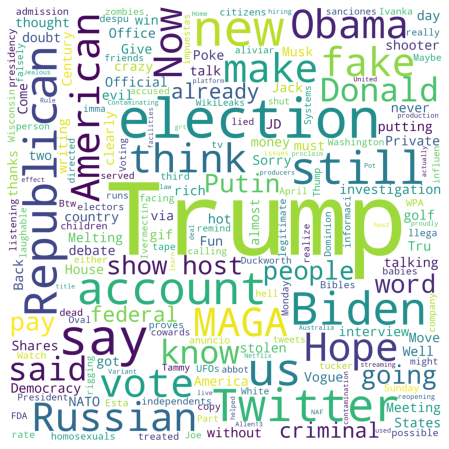

In [11]:
## preparing for lift off..

    # calling main function
run()